# IMPORT MODULES


In [15]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import warnings
warnings.filterwarnings('ignore')

# LOADING THE DATASET

In [16]:
data=pd.read_csv("housing.csv")
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [17]:
data=data.drop(['ocean_proximity'],axis=1)

In [18]:
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0
...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0


# DATA EXPLORATION

In [19]:
data.dropna(inplace=True)
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0
...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0


In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
dtypes: float64(9)
memory usage: 1.6 MB


In [21]:
data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000
mean,-119.570689,35.633221,28.633094,2636.504233,537.870553,1424.946949,499.433465,3.871162,206864.413155
std,2.003578,2.136348,12.591805,2185.269567,421.385070,1133.208490,382.299226,1.899291,115435.667099
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1450.000000,296.000000,787.000000,280.000000,2.563700,119500.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.536500,179700.000000
75%,-118.010000,37.720000,37.000000,3143.000000,647.000000,1722.000000,604.000000,4.744000,264700.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [22]:
from sklearn.model_selection import train_test_split
x= data.drop(['median_house_value'],axis=1)
y= data['median_house_value']

In [23]:
x

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462
...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672


In [24]:
y

0        452600.0
1        358500.0
2        352100.0
3        341300.0
4        342200.0
           ...   
20635     78100.0
20636     77100.0
20637     92300.0
20638     84700.0
20639     89400.0
Name: median_house_value, Length: 20433, dtype: float64

In [25]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2) 

In [26]:
train_data=x_train.join(y_train)

In [27]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
16010,-122.46,37.74,52.0,2180.0,326.0,856.0,326.0,5.3961,416900.0
12675,-121.39,38.51,19.0,1808.0,375.0,758.0,320.0,2.0062,92000.0
359,-122.14,37.76,34.0,1513.0,231.0,545.0,211.0,5.5701,252800.0
6424,-118.00,34.14,39.0,1302.0,303.0,800.0,291.0,3.2723,166900.0
20014,-118.92,36.04,28.0,1148.0,233.0,521.0,212.0,2.9208,98500.0
...,...,...,...,...,...,...,...,...,...
11776,-121.28,38.76,47.0,2901.0,631.0,1276.0,578.0,2.1366,101900.0
13859,-117.27,34.48,8.0,1794.0,276.0,690.0,271.0,3.6620,165300.0
4640,-118.29,34.06,23.0,2040.0,778.0,2235.0,697.0,1.9309,233300.0
6982,-118.01,33.96,36.0,1805.0,288.0,882.0,308.0,5.3054,273500.0


# DATA ANALYSIS


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

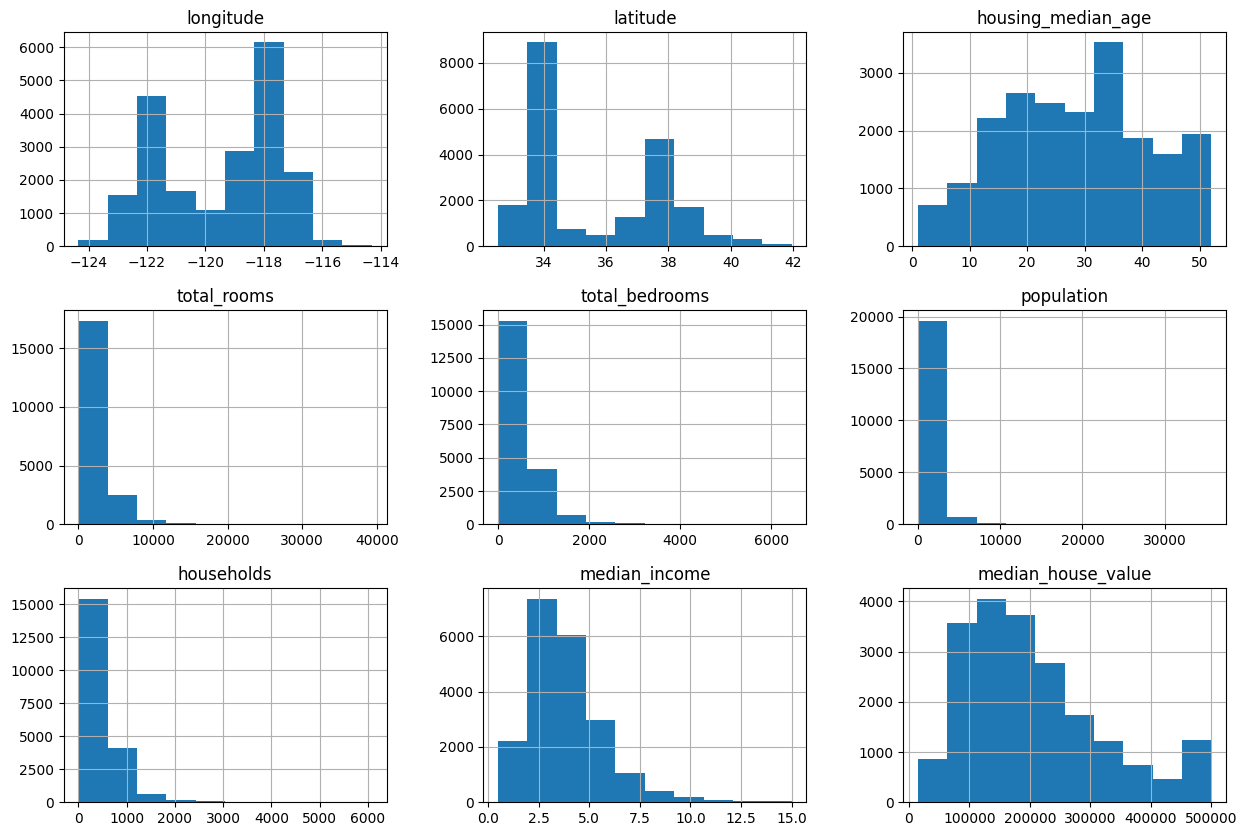

In [28]:
data.hist(figsize=(15,10))

# CORRELATION MATRIX

In [29]:
data.corr()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924616,-0.109357,0.045480,0.069608,0.100270,0.056513,-0.015550,-0.045398
latitude,-0.924616,1.000000,0.011899,-0.036667,-0.066983,-0.108997,-0.071774,-0.079626,-0.144638
housing_median_age,-0.109357,0.011899,1.000000,-0.360628,-0.320451,-0.295787,-0.302768,-0.118278,0.106432
total_rooms,0.045480,-0.036667,-0.360628,1.000000,0.930380,0.857281,0.918992,0.197882,0.133294
total_bedrooms,0.069608,-0.066983,-0.320451,0.930380,1.000000,0.877747,0.979728,-0.007723,0.049686
population,0.100270,-0.108997,-0.295787,0.857281,0.877747,1.000000,0.907186,0.005087,-0.025300
households,0.056513,-0.071774,-0.302768,0.918992,0.979728,0.907186,1.000000,0.013434,0.064894
median_income,-0.015550,-0.079626,-0.118278,0.197882,-0.007723,0.005087,0.013434,1.000000,0.688355
median_house_value,-0.045398,-0.144638,0.106432,0.133294,0.049686,-0.025300,0.064894,0.688355,1.000000


<Axes: >

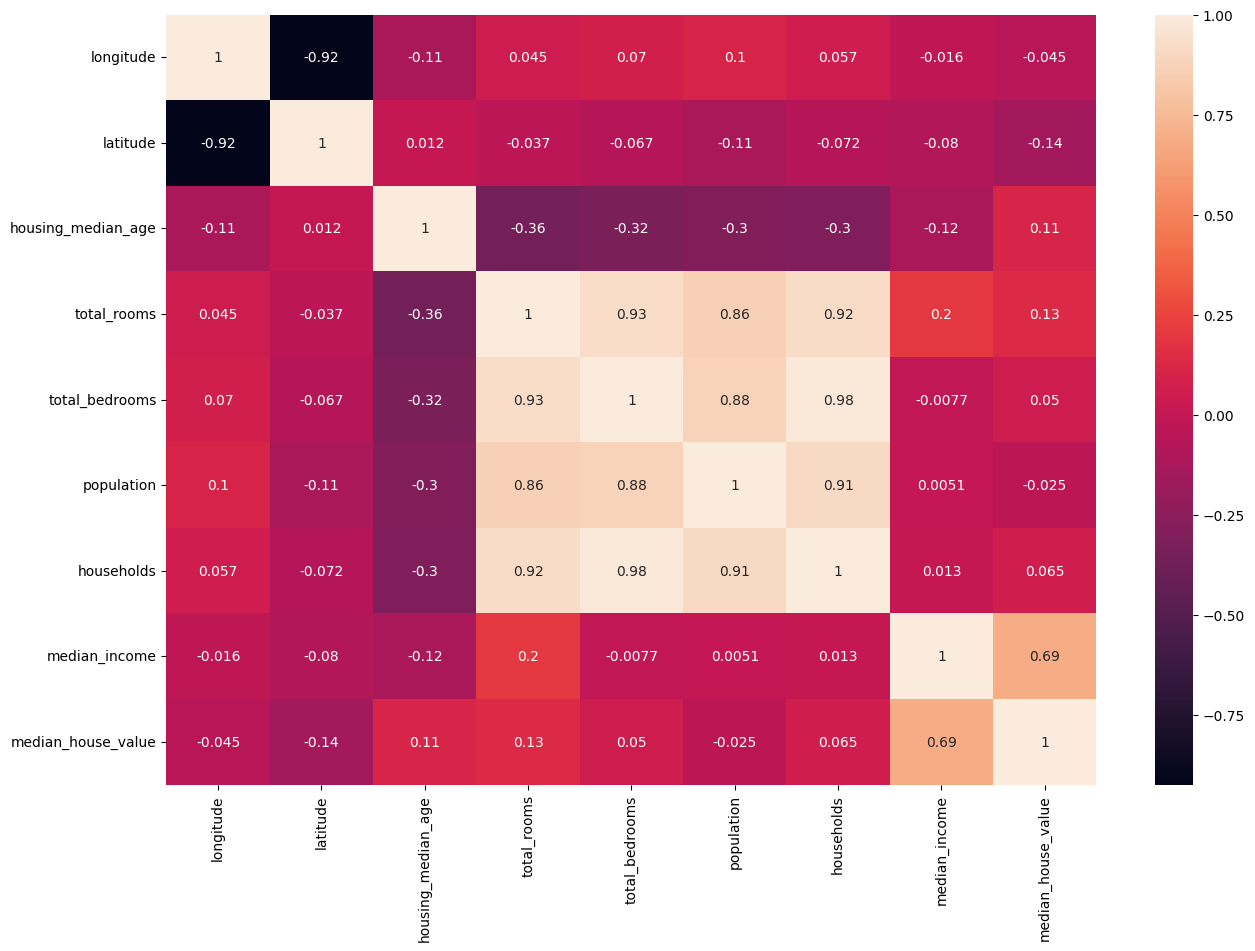

In [30]:
plt.figure(figsize=(15,10))
sns.heatmap(data.corr(),annot=True)

In [31]:
train_data['total_rooms']= np.log(train_data['total_rooms'] + 1)
train_data['total_bedrooms']= np.log(train_data['total_bedrooms'] +1)
train_data['population']= np.log(train_data['population'] + 1)
train_data['households']= np.log(train_data['households'] + 1)

In [32]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
16010,-122.46,37.74,52.0,7.687539,5.789960,6.753438,5.789960,5.3961,416900.0
12675,-121.39,38.51,19.0,7.500529,5.929589,6.632002,5.771441,2.0062,92000.0
359,-122.14,37.76,34.0,7.322510,5.446737,6.302619,5.356586,5.5701,252800.0
6424,-118.00,34.14,39.0,7.172425,5.717028,6.685861,5.676754,3.2723,166900.0
20014,-118.92,36.04,28.0,7.046647,5.455321,6.257668,5.361292,2.9208,98500.0
...,...,...,...,...,...,...,...,...,...
11776,-121.28,38.76,47.0,7.973155,6.448889,7.152269,6.361302,2.1366,101900.0
13859,-117.27,34.48,8.0,7.492760,5.624018,6.538140,5.605802,3.6620,165300.0
4640,-118.29,34.06,23.0,7.621195,6.658011,7.712444,6.548219,1.9309,233300.0
6982,-118.01,33.96,36.0,7.498870,5.666427,6.783325,5.733341,5.3054,273500.0


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

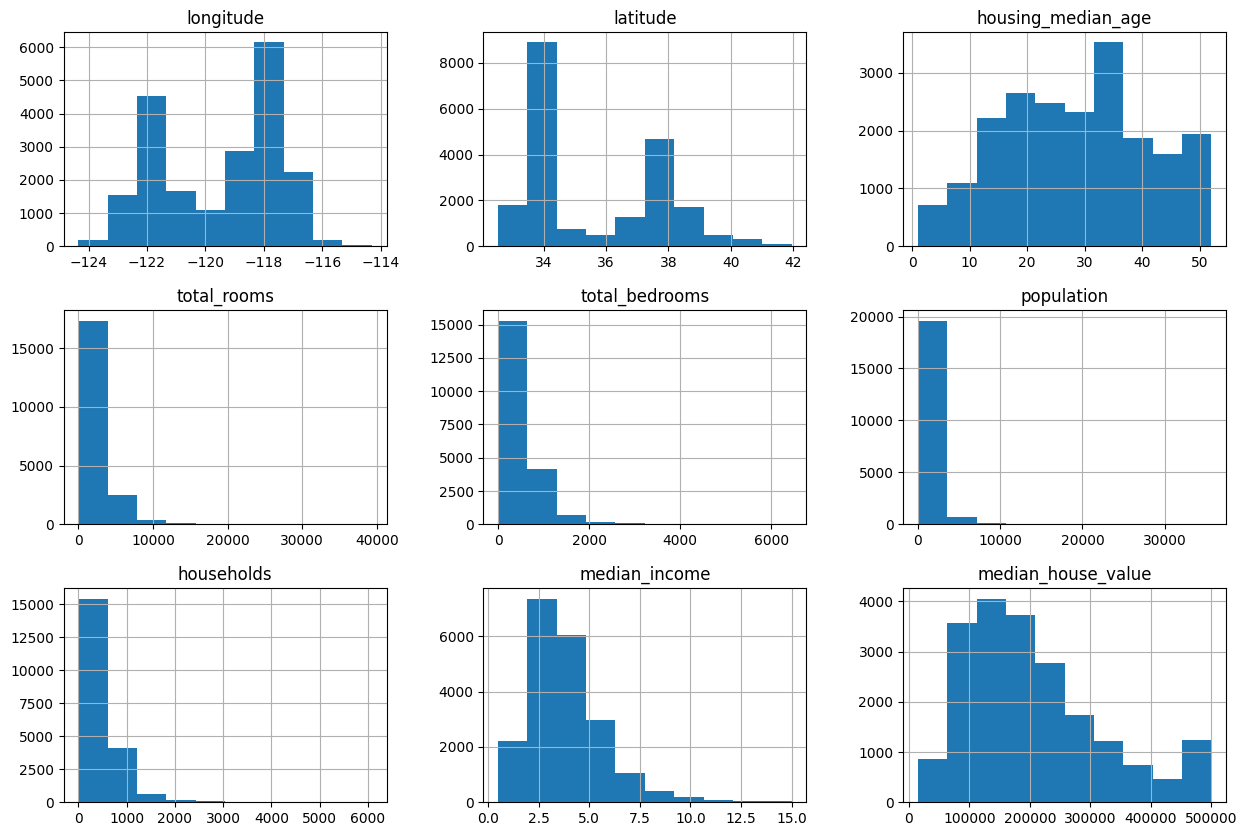

In [33]:
data.hist(figsize=(15,10))

# DATA VISUALISATION

<Axes: xlabel='latitude', ylabel='longitude'>

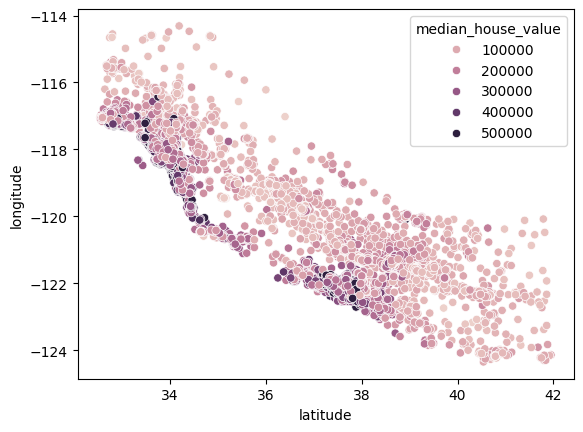

In [34]:
 sns.scatterplot(x='latitude',y='longitude',data=train_data, hue='median_house_value')

<Axes: xlabel='total_bedrooms', ylabel='total_rooms'>

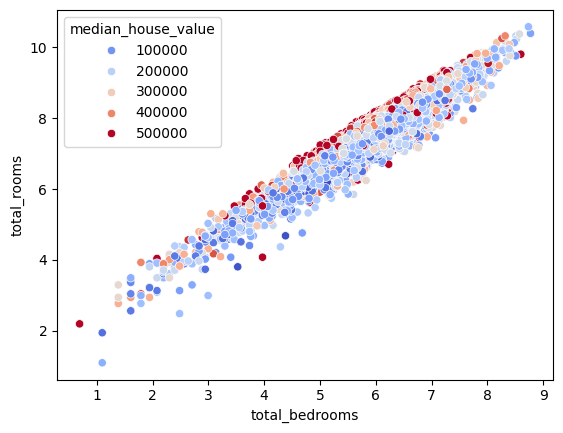

In [35]:
sns.scatterplot(x='total_bedrooms',y='total_rooms',data=train_data, hue='median_house_value',palette="coolwarm")

In [36]:
train_data['bedroom_ratio']= train_data['total_bedrooms'] / train_data['total_rooms']
train_data['household_rooms']= train_data['total_rooms'] / train_data['households']

<Axes: xlabel='bedroom_ratio', ylabel='household_rooms'>

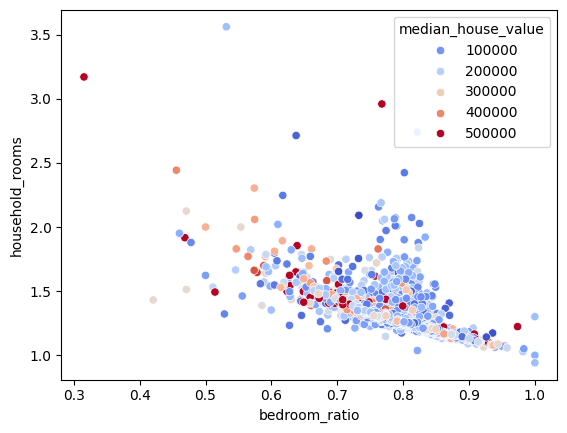

In [37]:
sns.scatterplot(x='bedroom_ratio',y='household_rooms',data=train_data, hue='median_house_value',palette="coolwarm")

In [38]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,bedroom_ratio,household_rooms
16010,-122.46,37.74,52.0,7.687539,5.789960,6.753438,5.789960,5.3961,416900.0,0.753162,1.327736
12675,-121.39,38.51,19.0,7.500529,5.929589,6.632002,5.771441,2.0062,92000.0,0.790556,1.299594
359,-122.14,37.76,34.0,7.322510,5.446737,6.302619,5.356586,5.5701,252800.0,0.743835,1.367011
6424,-118.00,34.14,39.0,7.172425,5.717028,6.685861,5.676754,3.2723,166900.0,0.797084,1.263473
20014,-118.92,36.04,28.0,7.046647,5.455321,6.257668,5.361292,2.9208,98500.0,0.774173,1.314356
...,...,...,...,...,...,...,...,...,...,...,...
11776,-121.28,38.76,47.0,7.973155,6.448889,7.152269,6.361302,2.1366,101900.0,0.808825,1.253384
13859,-117.27,34.48,8.0,7.492760,5.624018,6.538140,5.605802,3.6620,165300.0,0.750594,1.336608
4640,-118.29,34.06,23.0,7.621195,6.658011,7.712444,6.548219,1.9309,233300.0,0.873618,1.163858
6982,-118.01,33.96,36.0,7.498870,5.666427,6.783325,5.733341,5.3054,273500.0,0.755637,1.307941


<Axes: >

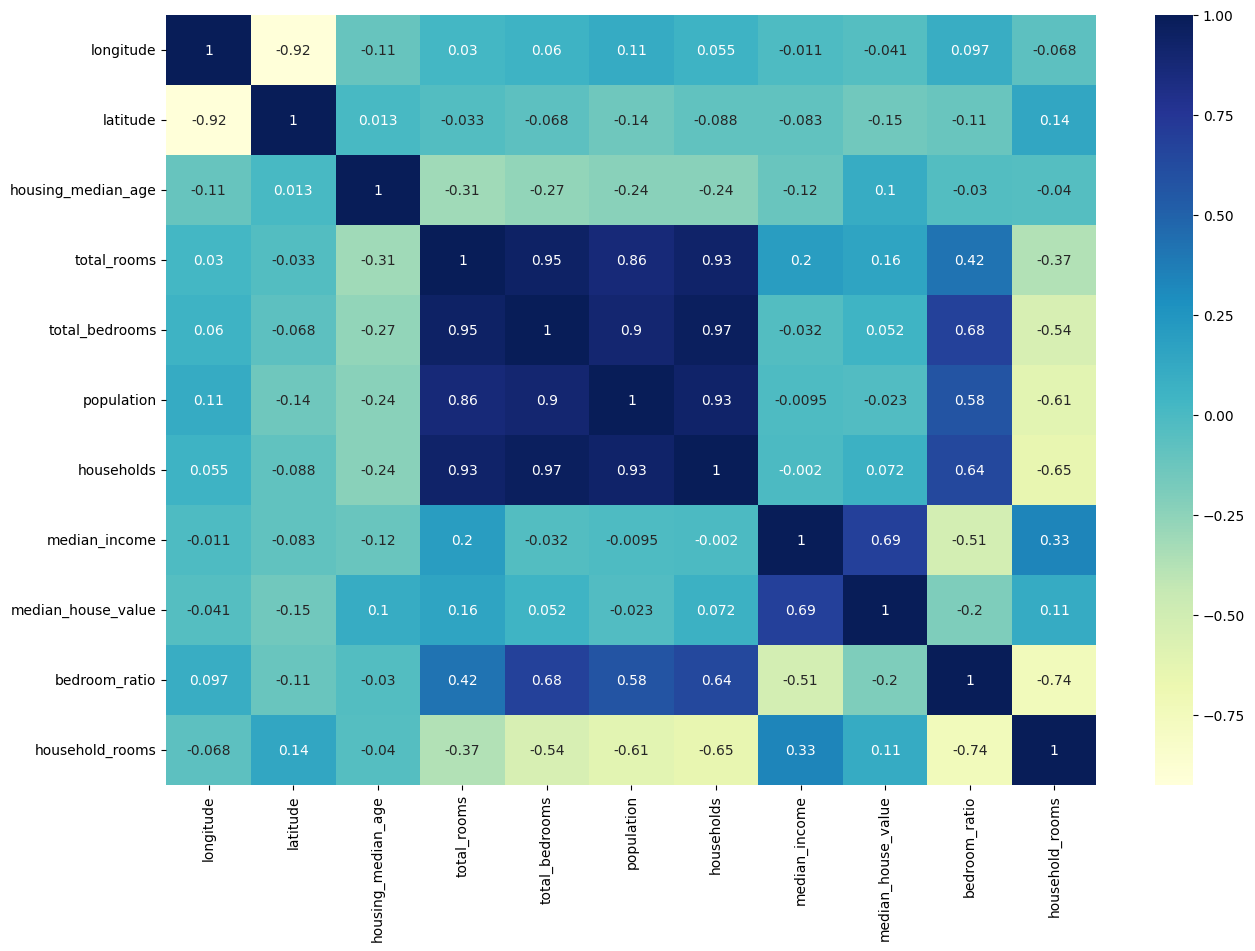

In [39]:
plt.figure(figsize=(15,10))
sns.heatmap(train_data.corr(),annot=True,cmap="YlGnBu")

# TRAINING AND TESTING

In [40]:
train_data.dropna(inplace=True)

In [41]:
from sklearn.model_selection import train_test_split
x= data.drop(['median_house_value'],axis=1)
y= data['median_house_value']

In [42]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2) 

In [43]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import pickle

In [44]:
X=train_data.drop(['median_house_value'],axis=1)
Y=train_data['median_house_value']
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.30)

In [45]:
X

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,bedroom_ratio,household_rooms
16010,-122.46,37.74,52.0,7.687539,5.789960,6.753438,5.789960,5.3961,0.753162,1.327736
12675,-121.39,38.51,19.0,7.500529,5.929589,6.632002,5.771441,2.0062,0.790556,1.299594
359,-122.14,37.76,34.0,7.322510,5.446737,6.302619,5.356586,5.5701,0.743835,1.367011
6424,-118.00,34.14,39.0,7.172425,5.717028,6.685861,5.676754,3.2723,0.797084,1.263473
20014,-118.92,36.04,28.0,7.046647,5.455321,6.257668,5.361292,2.9208,0.774173,1.314356
...,...,...,...,...,...,...,...,...,...,...
11776,-121.28,38.76,47.0,7.973155,6.448889,7.152269,6.361302,2.1366,0.808825,1.253384
13859,-117.27,34.48,8.0,7.492760,5.624018,6.538140,5.605802,3.6620,0.750594,1.336608
4640,-118.29,34.06,23.0,7.621195,6.658011,7.712444,6.548219,1.9309,0.873618,1.163858
6982,-118.01,33.96,36.0,7.498870,5.666427,6.783325,5.733341,5.3054,0.755637,1.307941


In [46]:
Y

16010    416900.0
12675     92000.0
359      252800.0
6424     166900.0
20014     98500.0
           ...   
11776    101900.0
13859    165300.0
4640     233300.0
6982     273500.0
9935     130200.0
Name: median_house_value, Length: 16346, dtype: float64

In [47]:
model=LinearRegression()
model.fit(x_train,y_train)
print("Linear Regression Accuracy: ",model.score(x_test,y_test)*100)

Linear Regression Accuracy:  66.95767114814876


In [48]:
import pickle
fname='neww.sav'
pickle.dump(model,open(fname,'wb'))

In [49]:
load_model=pickle.load(open(fname,'rb'))

In [50]:
load_model.predict([[-118.05,33.73,25.0,7.813187,6.111467,7.171657,6.148468,5.0699,0.782199,1.270753]])

array([260176.17991975])

In [56]:
load_model.predict([[-122.30,38.27,4.0,6.958448,5.575949,6.122493,5.517453,3.6389,0.801321,1.261170]])

array([214516.08355005])